In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import random

<h3>Task 1</h3>

In [2]:
df = pd.read_csv("/Users/herrakaava/Documents/school/sekamallit/week_1/Spruce.csv", index_col=0)

This data frame contains the following columns:

**Tree**
- a factor giving a unique identifier for each tree.

**days**
- a numeric vector giving the number of days since the beginning of the experiment.

**logSize**
- a numeric vector giving the logarithm of an estimate of the volume of the tree trunk.

**plot**
- a factor identifying the plot in which the tree was grown.

In [3]:
df.head()

,Tree,days,logSize,plot
1,O1T01,152,4.51,1
2,O1T01,174,4.98,1
3,O1T01,201,5.41,1
4,O1T01,227,5.90,1
5,O1T01,258,6.15,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1027 entries, 1 to 1027
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tree     1027 non-null   object 
 1   days     1027 non-null   int64  
 2   logSize  1027 non-null   float64
 3   plot     1027 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 40.1+ KB


In [5]:
df.shape

(1027, 4)

In [6]:
df["Tree"].unique()

array(['O1T01', 'O1T02', 'O1T03', 'O1T04', 'O1T05', 'O1T06', 'O1T07',
       'O1T08', 'O1T09', 'O1T10', 'O1T11', 'O1T12', 'O1T13', 'O1T14',
       'O1T15', 'O1T16', 'O1T17', 'O1T18', 'O1T19', 'O1T20', 'O1T21',
       'O1T22', 'O1T23', 'O1T24', 'O1T25', 'O1T26', 'O1T27', 'O2T01',
       'O2T02', 'O2T03', 'O2T04', 'O2T05', 'O2T06', 'O2T07', 'O2T08',
       'O2T09', 'O2T10', 'O2T11', 'O2T12', 'O2T13', 'O2T14', 'O2T15',
       'O2T16', 'O2T17', 'O2T18', 'O2T19', 'O2T20', 'O2T21', 'O2T22',
       'O2T23', 'O2T24', 'O2T25', 'O2T26', 'O2T27', 'N1T01', 'N1T02',
       'N1T03', 'N1T04', 'N1T05', 'N1T06', 'N1T07', 'N1T08', 'N1T09',
       'N1T10', 'N1T11', 'N1T12', 'N2T01', 'N2T02', 'N2T03', 'N2T04',
       'N2T05', 'N2T06', 'N2T07', 'N2T08', 'N2T09', 'N2T10', 'N2T11',
       'N2T12', 'N2T13'], dtype=object)

<p style="margin-bottom: 15px;">The identifier of each tree tells whether the tree was exposed to ozone-rich atmosphere (O) or to a normal atmosphere (N).</p>
<p style="margin-bottom: 15px;">The instances in the 'Tree' variable are part of a larger population (all the possible trees that could have been part of the experiment), which means that they are random samples. Therefore, it could be appropriate to model the 'Tree' variable as random effect.</p>
<p style="margin-bottom: 15px;">The different plot types can also be considered as a random sample from a larger population of possible plots. It is clear that different plots have different characteristics and growing conditions. If we are not interested in the specific effects of the different plots, we could treat the 'plot' variable as random effect. This way we are accounting for the environmental variability without focusing on the specific plots themselves. If, however, we are interested in the effects of the plots on the trees, we could model the 'plot' variable as fixed effect.</p>
<p style="margin-bottom: 15px;">Muuttujien (tekijöiden) sanotaan olevan <b>ristikkäisiä</b> silloin, kun jokainen yhden muuttujan taso (luokka) esiintyy jokaisen toisen tekijän tason kanssa (kaikki muuttujien luokkien parittaiset kombinaatiot esiintyvät aineistossa). Tämä tarkoittaa sitä, että jos 'Tree' ja 'plot' -muuttujat olisivat <b>ristikkäisiä</b>, niin jokainen puu olisi kasvatettu jokaisella alueella. Näin ei ole, koska jokainen puu esiintyy ainoastaan yhdellä alueella.</p>
<p style="margin-bottom: 15px;">Muuttujan B sanotaan olevan <b>sisäkkäinen</b> (nested in) muuttujan A suhteen, jos jokainen muuttujan B luokka esiintyy yhdessä vain yhden muuttujan A luokan kanssa. Koska jokainen puu esiintyy ainoastaan yhdellä alueella, muuttuja 'Tree' on <b>sisäkkäinen</b> muuttujan 'plot' suhteen.</p>
<p style="margin-bottom: 15px;">Aineiston sanotaan olevan tasapainoinen (balanced)</p>

- muuttujan A suhteen, jos jokaisesta sen tasosta on yhtä monta havaintoa
- ristikkäisten muuttujien A ja B suhteen, jos jokaisesta niiden luokkien kombinaatiosta on yhtä monta havaintoa

<h3>Tarkastetaan sisäkkäisyys / ristikkäisyys</h3>

In [7]:
# Count the number of unique plots for each tree
tree_plot_unique = df.groupby(["Tree"])["plot"].nunique().reset_index(name="unique_plots")

In [8]:
tree_plot_unique

,Tree,unique_plots
0,N1T01,1
1,N1T02,1
2,N1T03,1
3,N1T04,1
4,N1T05,1
...,...,...
74,O2T23,1
75,O2T24,1
76,O2T25,1
77,O2T26,1


In [9]:
# Check if any tree appears in more than one plot
(tree_plot_unique["unique_plots"] > 1).any()

False

<h3>Tarkastetaan tasapainoisuus</h3>

In [10]:
np.unique(df["Tree"], return_counts=True)

(array(['N1T01', 'N1T02', 'N1T03', 'N1T04', 'N1T05', 'N1T06', 'N1T07',
        'N1T08', 'N1T09', 'N1T10', 'N1T11', 'N1T12', 'N2T01', 'N2T02',
        'N2T03', 'N2T04', 'N2T05', 'N2T06', 'N2T07', 'N2T08', 'N2T09',
        'N2T10', 'N2T11', 'N2T12', 'N2T13', 'O1T01', 'O1T02', 'O1T03',
        'O1T04', 'O1T05', 'O1T06', 'O1T07', 'O1T08', 'O1T09', 'O1T10',
        'O1T11', 'O1T12', 'O1T13', 'O1T14', 'O1T15', 'O1T16', 'O1T17',
        'O1T18', 'O1T19', 'O1T20', 'O1T21', 'O1T22', 'O1T23', 'O1T24',
        'O1T25', 'O1T26', 'O1T27', 'O2T01', 'O2T02', 'O2T03', 'O2T04',
        'O2T05', 'O2T06', 'O2T07', 'O2T08', 'O2T09', 'O2T10', 'O2T11',
        'O2T12', 'O2T13', 'O2T14', 'O2T15', 'O2T16', 'O2T17', 'O2T18',
        'O2T19', 'O2T20', 'O2T21', 'O2T22', 'O2T23', 'O2T24', 'O2T25',
        'O2T26', 'O2T27'], dtype=object),
 array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 1

In [11]:
np.unique(df["plot"], return_counts=True)

(array([1, 2, 3, 4]), array([351, 351, 156, 169]))

Aineisto on tasapainoinen muuttujan 'Tree' suhteen, mutta ei muuttujan 'plot' suhteen.

<h3>Task 3</h3>

In [12]:
def simulate_data(m: int):
    """
    Simuloi aineiston, jossa m subjektilta (subject) on kultakin tietty määrä
    vastemuuttujan (response) mittauksia. Lisäksi ajatellaan, että kukin subjekteista
    on saanut yhden kahdesta eri käsittelystä (treatment)
    
    Params:
    m -- number of subjects
    
    Returns:
    my_data -- a Pandas DataFrame.
    """
    # Mittausten määrät ja käsittelyt 
    n_vec = np.random.geometric(p=1/2, size=m) + 1
    treat_vec = np.random.binomial(n=1, p=1/2, size=m)
    
    # df to store the results
    my_data = pd.DataFrame()
    
    # Luodaan havainnot yhdelle subjektille kerrallaan
    for i in range(m):
        n_i = n_vec[i]
        treat_i = treat_vec[i]
        rand_eff = np.random.normal()
        y = np.full(n_i, 2) + treat_i*np.full(n_i, -1) + rand_eff*np.full(n_i, 1) + np.random.normal(size=n_i)
        temp = pd.DataFrame({"response": np.round(y, 2),
                             "treatment": treat_i,
                             "subject": i+1})
        my_data = pd.concat([my_data, temp], ignore_index=True)
    
    # Muutetaan ryhmittelevät muuttujat kategorisiksi
    my_data["subject"] = my_data["subject"].astype("category")
    my_data["treatment"] = my_data["treatment"].astype("category")
    
    return my_data

In [13]:
data = simulate_data(m=10)

In [14]:
data

,response,treatment,subject
0,0.76,1,1
1,2.07,1,1
2,0.81,1,1
3,1.63,1,1
4,0.18,1,1
5,1.91,1,2
6,2.97,1,2
7,0.97,0,3
8,1.92,0,3
9,1.53,0,3


``` python
y <- rep(2, n_i) + treat_i*rep(-1, n_i) + rand_eff*rep(1, n_i) + rnorm(n_i)
```  
rep(2, n_i) $\, \boldsymbol{\rightarrow} \,$ jokaisen havainnon lähtötasoksi asetetaan 2.

$\, \text{treat_i} * \text{rep(-1, n_i)} \,$ $\, \boldsymbol{\rightarrow} \,$ jos $\, \text{treat_i} == 1, \,$ niin tämä termi vähentää kaikista havainnoista luvun 1.

$\, \text{rand_eff} * \text{rep(1, n_i)} \,$ $\, \boldsymbol{\rightarrow} \,$ tämä termi lisää satunnaisvaikutuksen jokaiseen havaintoon.

$\, \text{rnorm(n_i)} \,$ $\, \boldsymbol{\rightarrow} \,$ niin ikään satunnaisvaikutus, joka lisätään vasteisiin.

Toisin sanottuna käsittelyllä on vaikutus, joka laskee vasteen arvoa luvulla 1 (subjektille i tehdään käsittely, jos $\, \text{treat_i} = 1).$

<h3>Fit 1</h3>

In [15]:
# Fixed effect
fit_1 = smf.ols("response ~ treatment + subject", data=data).fit()

In [16]:
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     4.372
Date:                Fri, 06 Sep 2024   Prob (F-statistic):            0.00594
Time:                        09:40:06   Log-Likelihood:                -28.861
No. Observations:                  25   AIC:                             77.72
Df Residuals:                      15   BIC:                             89.91
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8860      0.218      8.

Muuttuja 'subject' on sisäkkäinen muuttujan 'treatment' suhteen, koska jokainen koehenkilö esiintyy ainoastaan yhdessä käsittelyryhmässä. Tämä tarkoittaa sitä, että kun tunnetaan koehenkilö, siitä voidaan automaattisesti päätellä käsittelyryhmä. Tämä tuottaa vahvan korrelaation sisäkkäisten muuttujien välille, jota myös summary-tulosteen viestit varoittelevat.

<h3>Fit 2</h3>

In [17]:
fit_2 = smf.mixedlm("response ~ treatment", 
                    groups=data["subject"], 
                    re_formula="1",
                    data=data).fit()

- "response ~ treatment": specifies the fixed part of the model
- groups=data["subject"]: defines the random effect grouping variable, which means that each subject has its own random intercept
- re_formula="1": specifies the random effects formula (1 means that the random effect is applied to the intercept $\, \boldsymbol{\rightarrow} \,$ random intercept model).

In [18]:
print(fit_2.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  response
No. Observations:  25       Method:              REML    
No. Groups:        10       Scale:               0.9943  
Min. group size:   2        Log-Likelihood:      -41.2193
Max. group size:   5        Converged:           Yes     
Mean group size:   2.5                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       2.393    0.625  3.827 0.000  1.167  3.619
treatment[T.1] -0.820    0.884 -0.927 0.354 -2.553  0.913
Group Var       1.526    1.260                           



In [19]:
fit_2.params["treatment[T.1]"]

-0.8197927013885912

In [20]:
def goodness_of_estimation(n: int, m: int):
    coefs = []
    for i in range(n):
        data_i = simulate_data(m)
        model = smf.mixedlm("response ~ treatment",
                            groups=data_i["subject"],
                            re_formula="1",
                            data=data_i).fit()
        coef_i = model.params["treatment[T.1]"]
        coefs.append(coef_i)
    coefs_mean = np.mean(coefs)
    coefs_std = np.std(coefs)
    print(f"Mean of the treatment effect over {n} generated datasets: {coefs_mean}")
    print(f"Std of the treatment effect over {n} generated datasets: {coefs_std}")

In [21]:
goodness_of_estimation(n=10, m=10)

Mean of the treatment effect over 10 generated datasets: -0.7496730404487046
Std of the treatment effect over 10 generated datasets: 0.7905293706880452


- The true treatment effect was -1.

In [22]:
print(f"Bias: {-1.0958697487854454 - (-1)}")

Bias: -0.09586974878544541


- The negative bias for the estimator suggests that on average, the model is slightly underestimating the treatment effect.

<h3>Task 4</h3>

In [59]:
def cov_1(n, params):
    # Create a diagonal matrix s.t. the elements of the input array are placed
    # along the diagonal, and all off-diagonal elements are set to zero
    sigma = np.diag(np.concatenate([np.tile(params[0], n//2), np.tile(params[1], n//2)], axis=0))
    return sigma

In [24]:
def cov_2(n, params):
    mat_1 = np.tile(np.arange(n), (n,1))
    mat_2 = np.tile(np.arange(n)[:, np.newaxis], (1,n))
    exp_mat = np.abs(mat_1 - mat_2)
    sigma = params ** exp_mat
    return sigma

In [25]:
def cov_3(n, params):
    size = n // 5
    cor_mat = np.full((size, size), params[1]) + (1 - params[1]) * np.eye(size)
    sigma_0 = params[0] * cor_mat
    sigma = np.kron(np.eye(5), sigma_0)
    return sigma

In [90]:
def visualize_sigma(n, sigma, ax, title):
    mu = np.zeros(n)
    y = np.random.multivariate_normal(mean=mu, cov=sigma)
    ax.plot(y, "o", markerfacecolor="none", color="black")
    ax.set_ylim([-3, 3])
    ax.axhline(0, color="black", linestyle="--")
    ax.set_title(title)

In [66]:
sigma_cov_1 = cov_1(n=50, params=[1, 0.04])

In [67]:
sigma_cov_2 = cov_2(n=50, params=0.95)

In [68]:
sigma_cov_3 = cov_3(n=50, params=[1, 0.8])

In [74]:
print(f"Shape of sigma_cov_1: {sigma_cov_1.shape}")
print(f"Shape of sigma_cov_2: {sigma_cov_2.shape}")
print(f"Shape of sigma_cov_3: {sigma_cov_3.shape}")

Shape of sigma_cov_1: (50, 50)
Shape of sigma_cov_2: (50, 50)
Shape of sigma_cov_3: (50, 50)


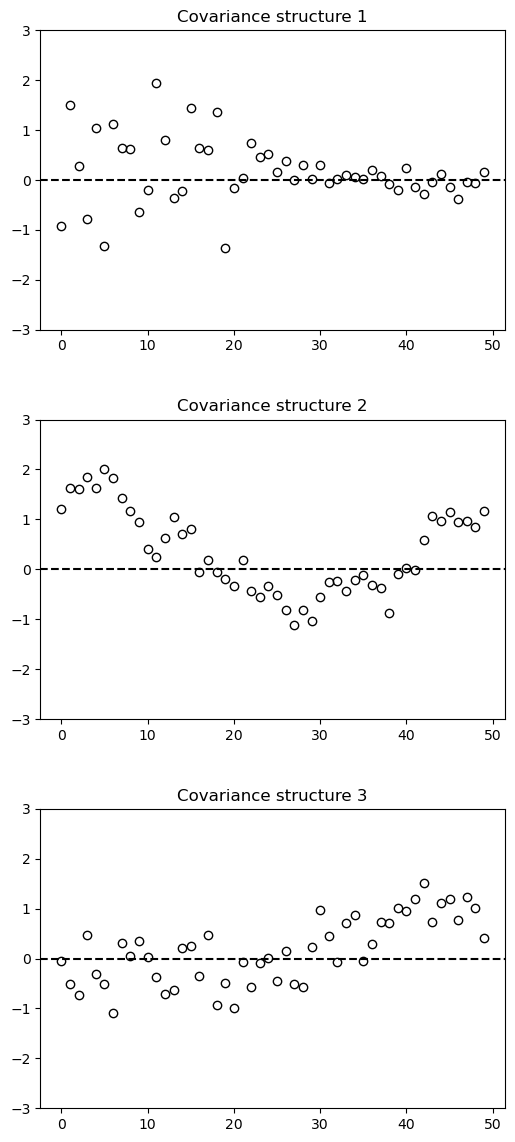

In [114]:
fig, ax = plt.subplots(figsize=(6,14), nrows=3, ncols=1, dpi=100)
visualize_sigma(n=50, sigma=sigma_cov_1, ax=ax[0], title="Covariance structure 1")
visualize_sigma(n=50, sigma=sigma_cov_2, ax=ax[1], title="Covariance structure 2")
visualize_sigma(n=50, sigma=sigma_cov_3, ax=ax[2], title="Covariance structure 3")
plt.subplots_adjust(hspace=0.3)

**Kovarianssirakenne 1**

- Kovarianssimatriisin päädiagonaalilla on ko. matriisin muuttujien varianssit (ts. kovarianssit itsensä kanssa), ja off-diagonaaleilla on eri muuttujien väliset kovarianssit.
- Kovarianssi kuvaa muuttujien välistä yhteisvaihtelua (lineaarista riippuvuutta).
- Koska kaikki off-diagonaalin alkiot ovat nollia, muuttujat ovat lineaarisesti riippumattomia.
- Ensimmäisen puoliskon alkioilla (jos esim. n=50, niin ensimmäisillä 25 alkiolla) varianssi on 1, ja jälkimmäisen puoliskon alkioilla varianssi on 0.04. Tämä näkyy selvästi kuvassa havaintopisteiden suurempana vaihteluna, kun verrataan ensimmäistä puoliskoa jälkimmäiseen puoliskoon.
- param[0] kuvaa 1. puoliskon varianssia, param[0] kuvaa 2. puoliskon varianssia.
- Ei selvää riippuvuutta (pl. varianssit).
- Voitaisiin käyttää missä tahansa tilanteessa, jossa eri populaatioilla on eri varianssit, mutta havaintopisteet ovat keskenään riippumattomia (muuttujilla ei keskenäistä korrelaatiota, mutta eroja hajonnassa).

**Kovarianssirakenne 2**

- Muistuttaa aikasarjaa alkioiden riippuvuuden osalta; toisiaan lähellä olevilla alkioilla on positiivinen korrelaatio (kun $\, y_i \,$ saa suuren arvon, myös $\, y_{i+1} \,$ saa suuren arvon, ja päinvastoin).
- Voitaisiin käyttää aikasarjan mallintamiseen.

**Kovarianssirakenne 3**

- param[0] kuvaa varianssia, param[1] kovarianssia.
- Tässä näkyy tuo blokki-rakenne alkioiden välillä.
- Blokkien välillä ei näytä olevan riippuvuuksia, mutta blokkien sisällä on samankaltaisuutta
- Voitaisiin käyttää tilanteissa, jossa on ryhmiä, jotka ovat riippuvia ryhmien sisällä, mutta ei ryhmien välillä.

<h3>Kronecker product</h3>

- The Kronecker product takes two matrices, A and B, and produces a larger matrix by multiplying each element of A by the entire matrix B. 
- If A is an m × n matrix and B is a p × q matrix, then the Kronecker product A ⊗ B is apm × qn block matrix.
- [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product)

In [28]:
A = np.eye(2)
B = np.array([5, 5, 5, 5]).reshape(2, 2)

In [29]:
A

array([[1., 0.],
       [0., 1.]])

In [30]:
B

array([[5, 5],
       [5, 5]])

In [32]:
np.kron(A, B)

array([[5., 5., 0., 0.],
       [5., 5., 0., 0.],
       [0., 0., 5., 5.],
       [0., 0., 5., 5.]])

<h3>Task 5</h3>

In [3]:
MA = pd.read_csv("/Users/herrakaava/Documents/school/sekamallit/week_1/MathAchieve.csv", index_col=0)

In [68]:
MA.index -= 1

In [69]:
MA.head()

,School,Minority,Sex,SES,MathAch,MEANSES
0,1224,No,Female,-1.528,5.876,-0.428
1,1224,No,Female,-0.588,19.708,-0.428
2,1224,No,Male,-0.528,20.349,-0.428
3,1224,No,Male,-0.668,8.781,-0.428
4,1224,No,Male,-0.158,17.898,-0.428


In [70]:
MA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 0 to 7184
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   School    7185 non-null   int64  
 1   Minority  7185 non-null   object 
 2   Sex       7185 non-null   object 
 3   SES       7185 non-null   float64
 4   MathAch   7185 non-null   float64
 5   MEANSES   7185 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 392.9+ KB


In [71]:
MA.isna().any()

School      False
Minority    False
Sex         False
SES         False
MathAch     False
MEANSES     False
dtype: bool

In [72]:
MA.shape

(7185, 6)

In [128]:
print(f"Range of math grades: [{np.min(MA["MathAch"])} ,{np.max(MA["MathAch"])}]")

Range of math grades: [-2.832 ,24.993]


In [147]:
print(f"Number of unique schools: {np.unique(MA["School"]).size}")

Number of unique schools: 160


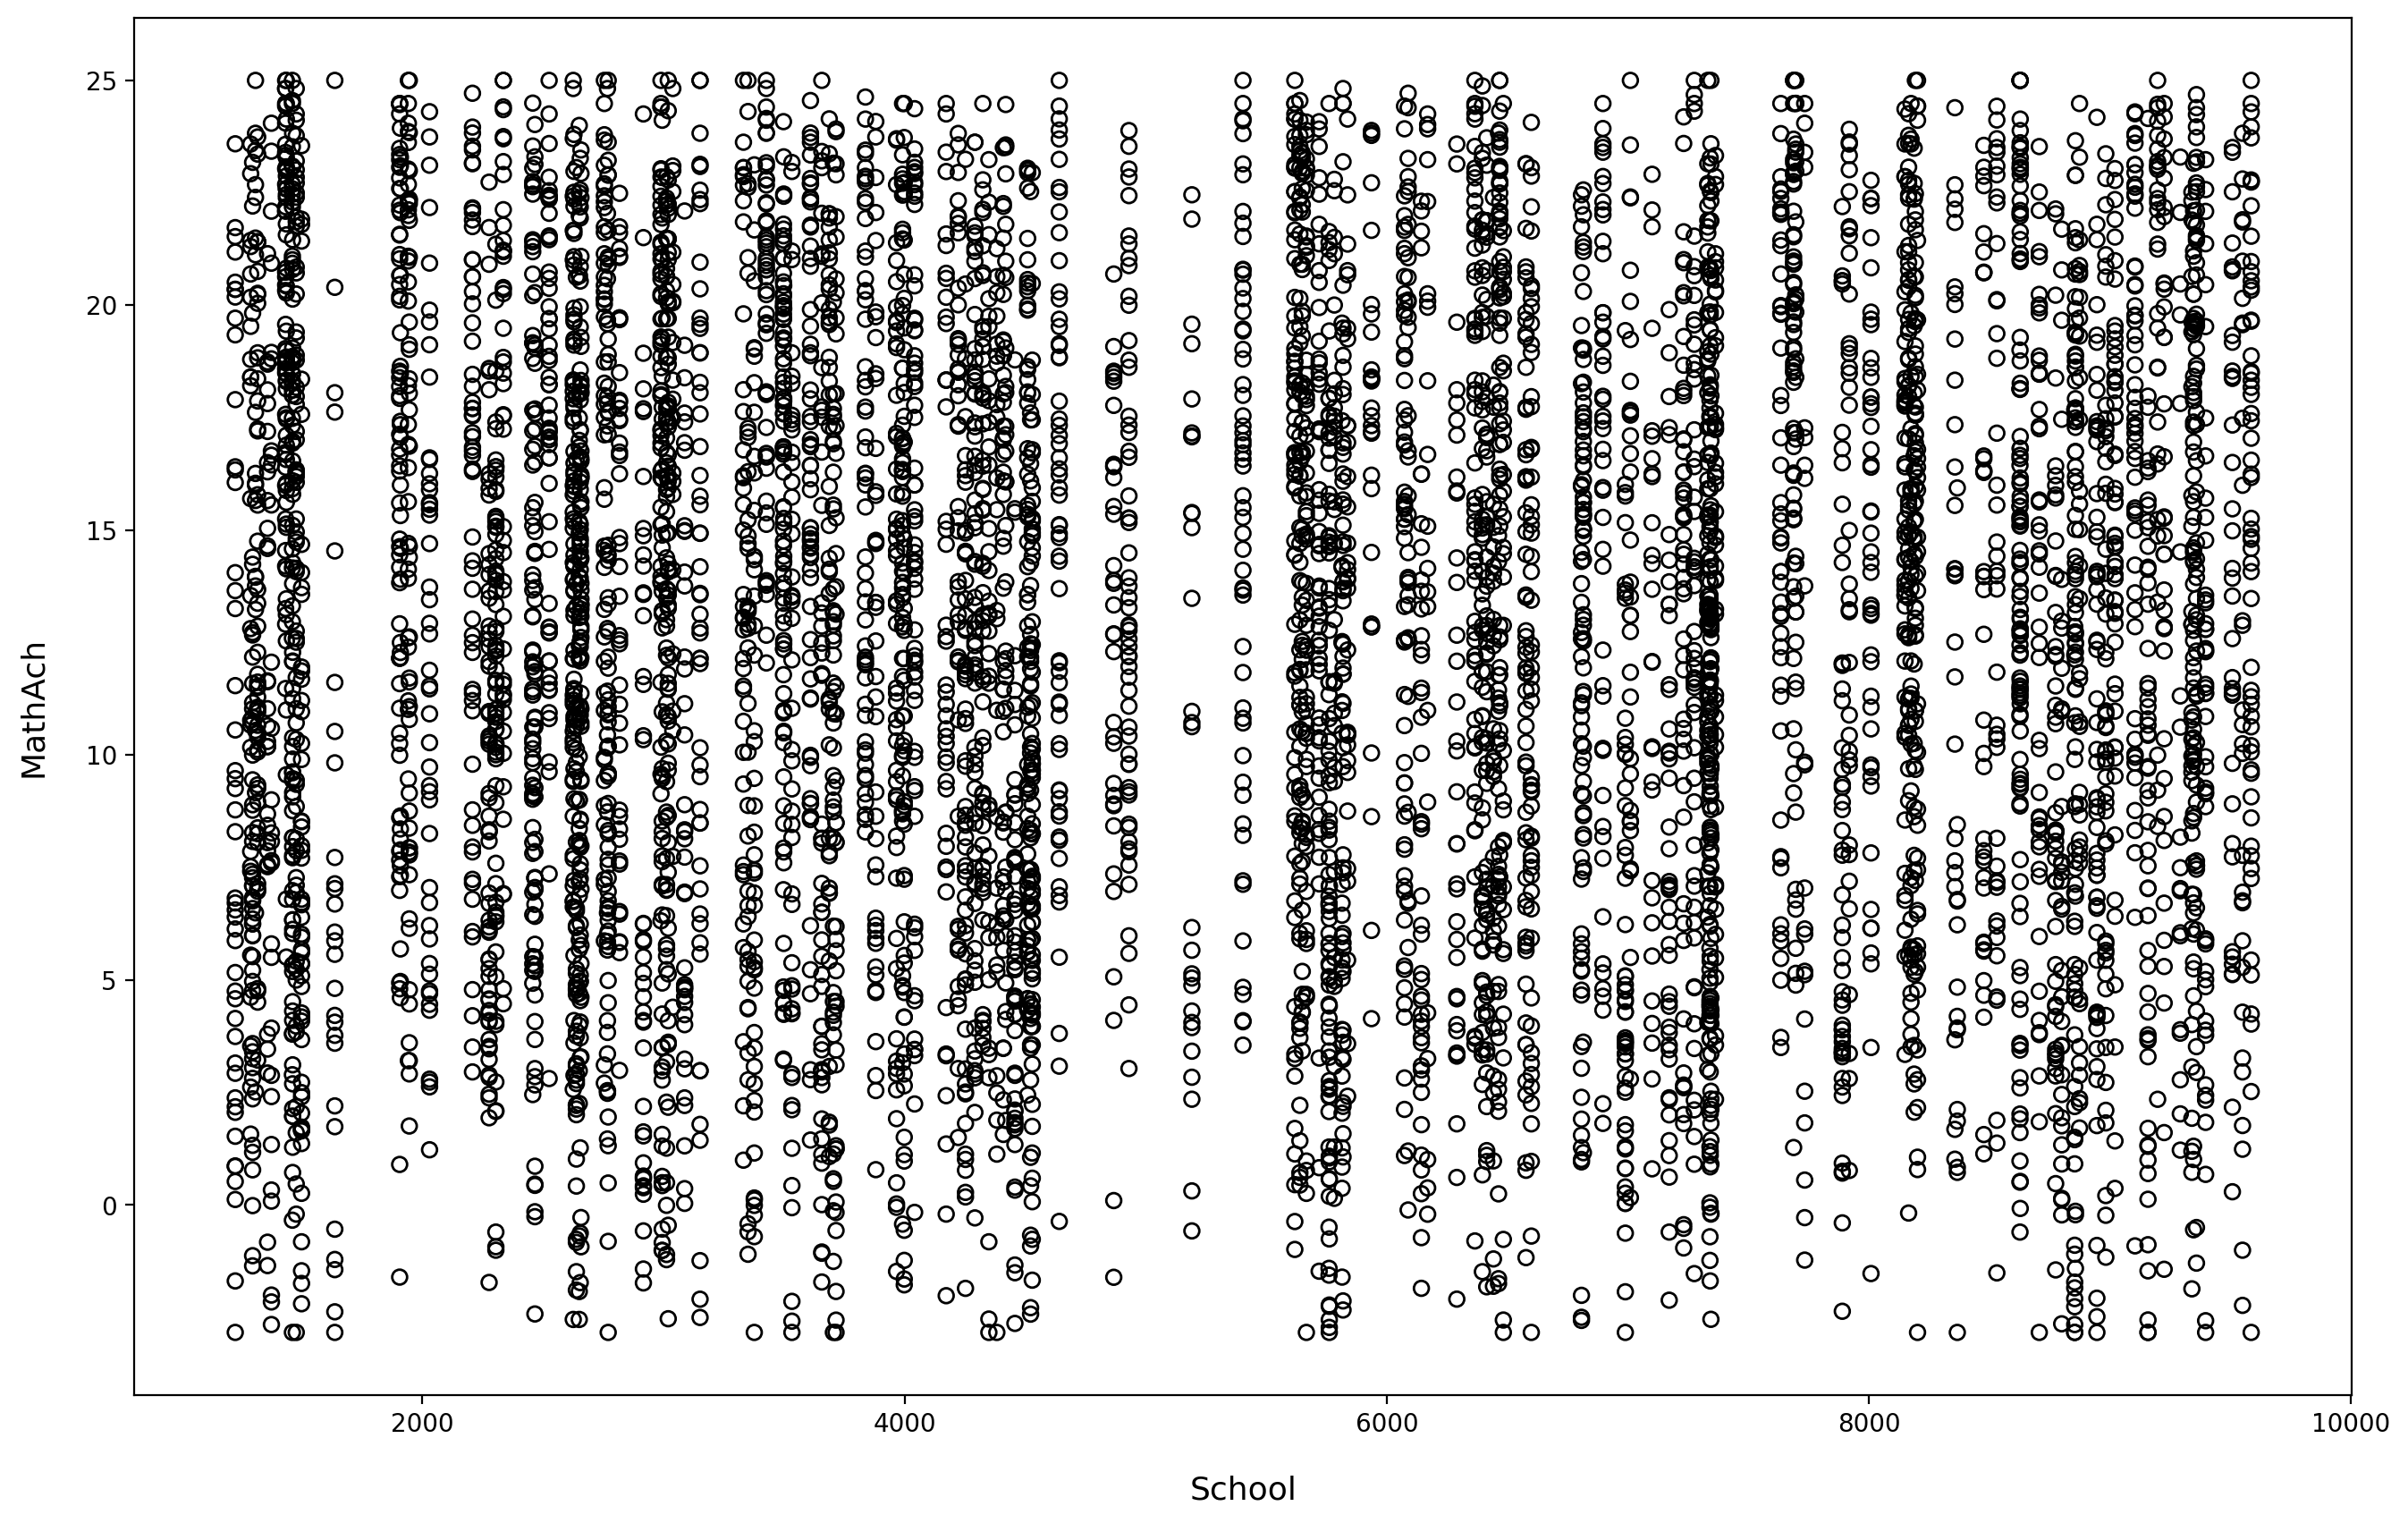

In [191]:
plt.figure(figsize=(16, 10), dpi=200)
plt.scatter(MA["School"], MA["MathAch"], edgecolors="black", facecolors="none")
plt.xlabel("School", size=13, labelpad=15)
plt.ylabel("MathAch", size=13, labelpad=15);

- The variation seems to be greater **within** the schools than **between** the schools.

In [4]:
def random_visual(size):
    """
    Params:
    size -- number of random schools to display in the plot
    """
    ##### Filtering #####
    unique_schools = MA["School"].unique()
    random_schools = random.sample(list(unique_schools), k=size)
    filtered_data = MA[MA["School"].isin(random_schools)]
    
    ##### Plotting #####
    plt.figure(figsize=(16, 8), dpi=100)
    sns.boxplot(x="School", y="MathAch", data=filtered_data)
    plt.title(f"Math grades for {size} randomly chosen schools")
    plt.xlabel("School", labelpad=15)
    plt.ylabel("MathAch", labelpad=15)
    plt.xticks(rotation=45);

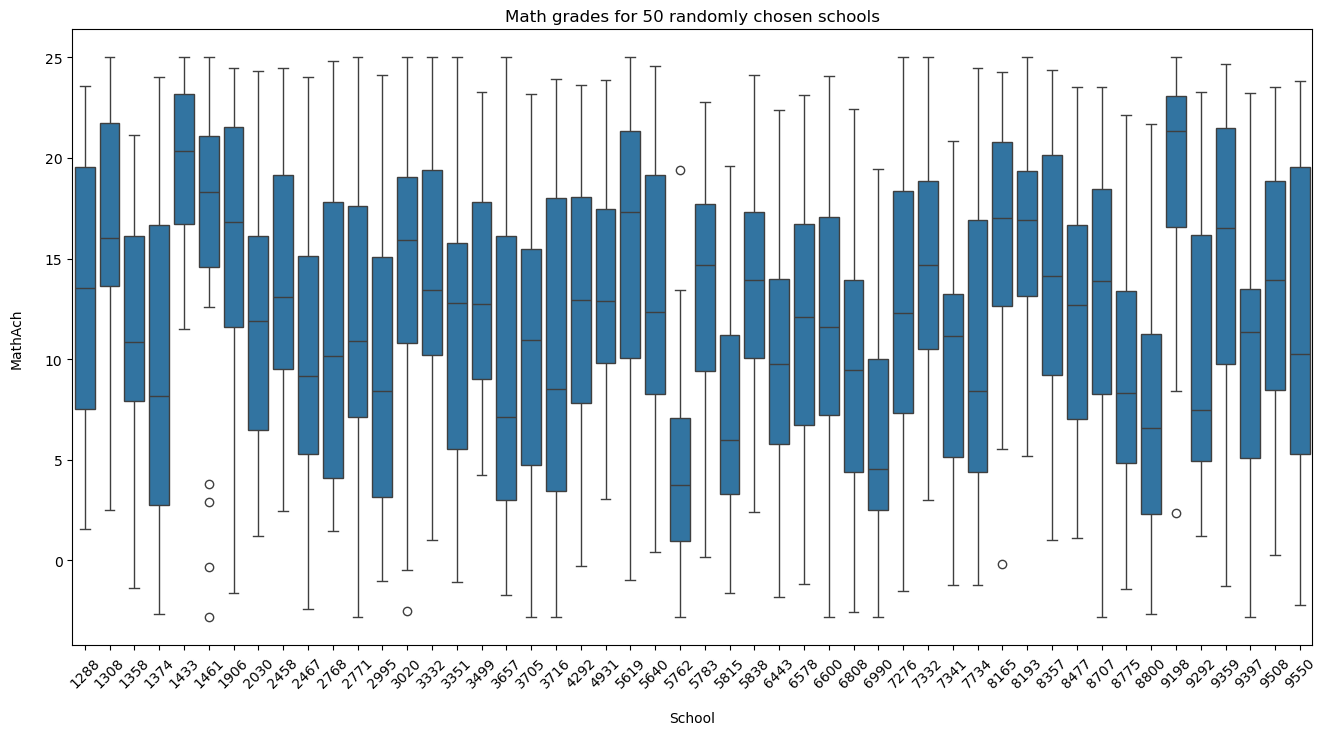

In [8]:
random_visual(50)

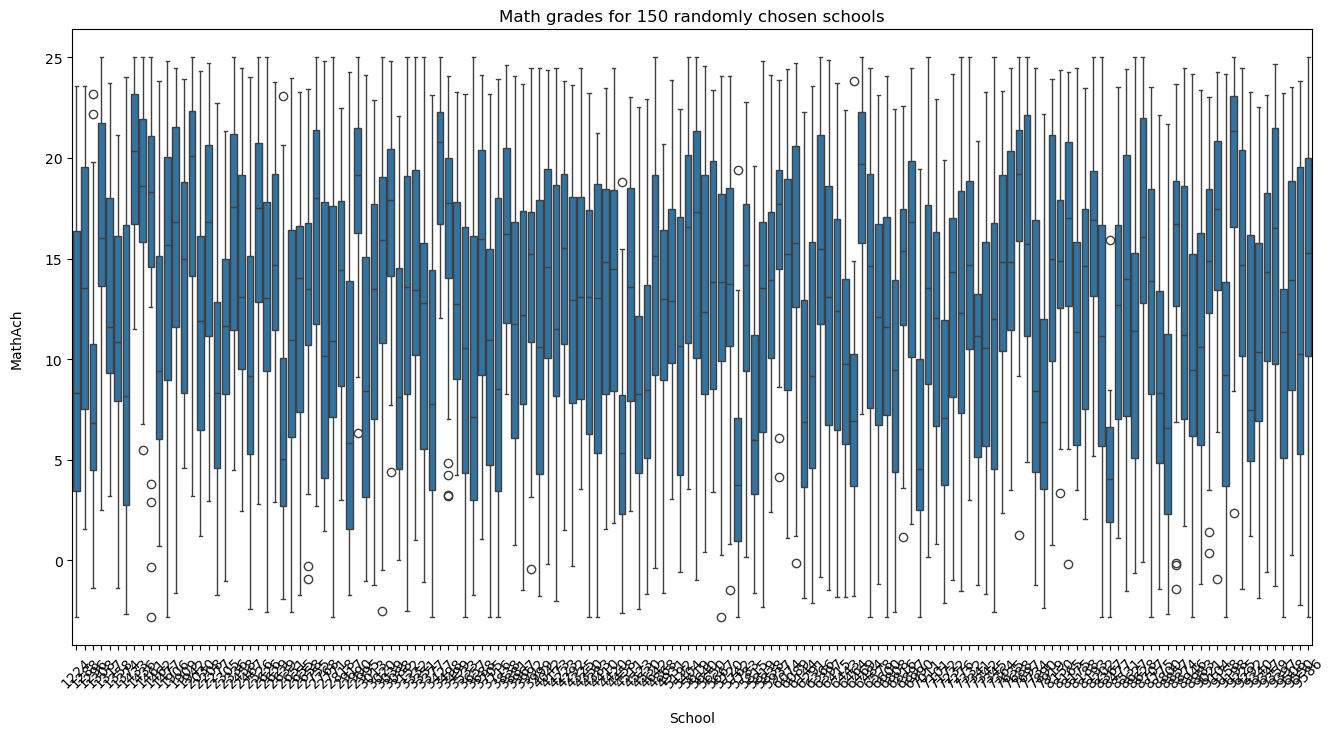

In [6]:
random_visual(150)

In [176]:
def mean_of_sds():
    """
    Calculates the mean of the standard deviations within the schools.
    """
    result = MA.groupby("School")["MathAch"].std().mean()
    print(f"Mean of the standard deviations within the schools: {result}")

In [177]:
def sd_of_means():
    """
    Calculates the standard deviation of the means within the schools.
    """
    result = MA.groupby("School")["MathAch"].mean().std()
    print(f"Standard deviation of the means within the schools: {result}")

In [179]:
mean_of_sds()

Mean of the standard deviations within the schools: 6.240845240421442


- This statistic captures the within-school variation.
- Measures the average variation **within** individual schools.

In [180]:
sd_of_means()

Standard deviation of the means within the schools: 3.117651323377808


- This statistic captures the between-schools variation.
- Measures the variation of the average performance **between** the schools.

$\, \boldsymbol{\rightarrow} \,$The statistics suggest that there is more variation in math achievement among students within individual schools.